GITHUB REPO- https://github.com/Yash-2704/ML-Assignments

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
# Overview
df.head()
df.isnull().sum()
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

imputer = SimpleImputer(strategy='mean')
df[cols_with_zero_invalid] = imputer.fit_transform(df[cols_with_zero_invalid])

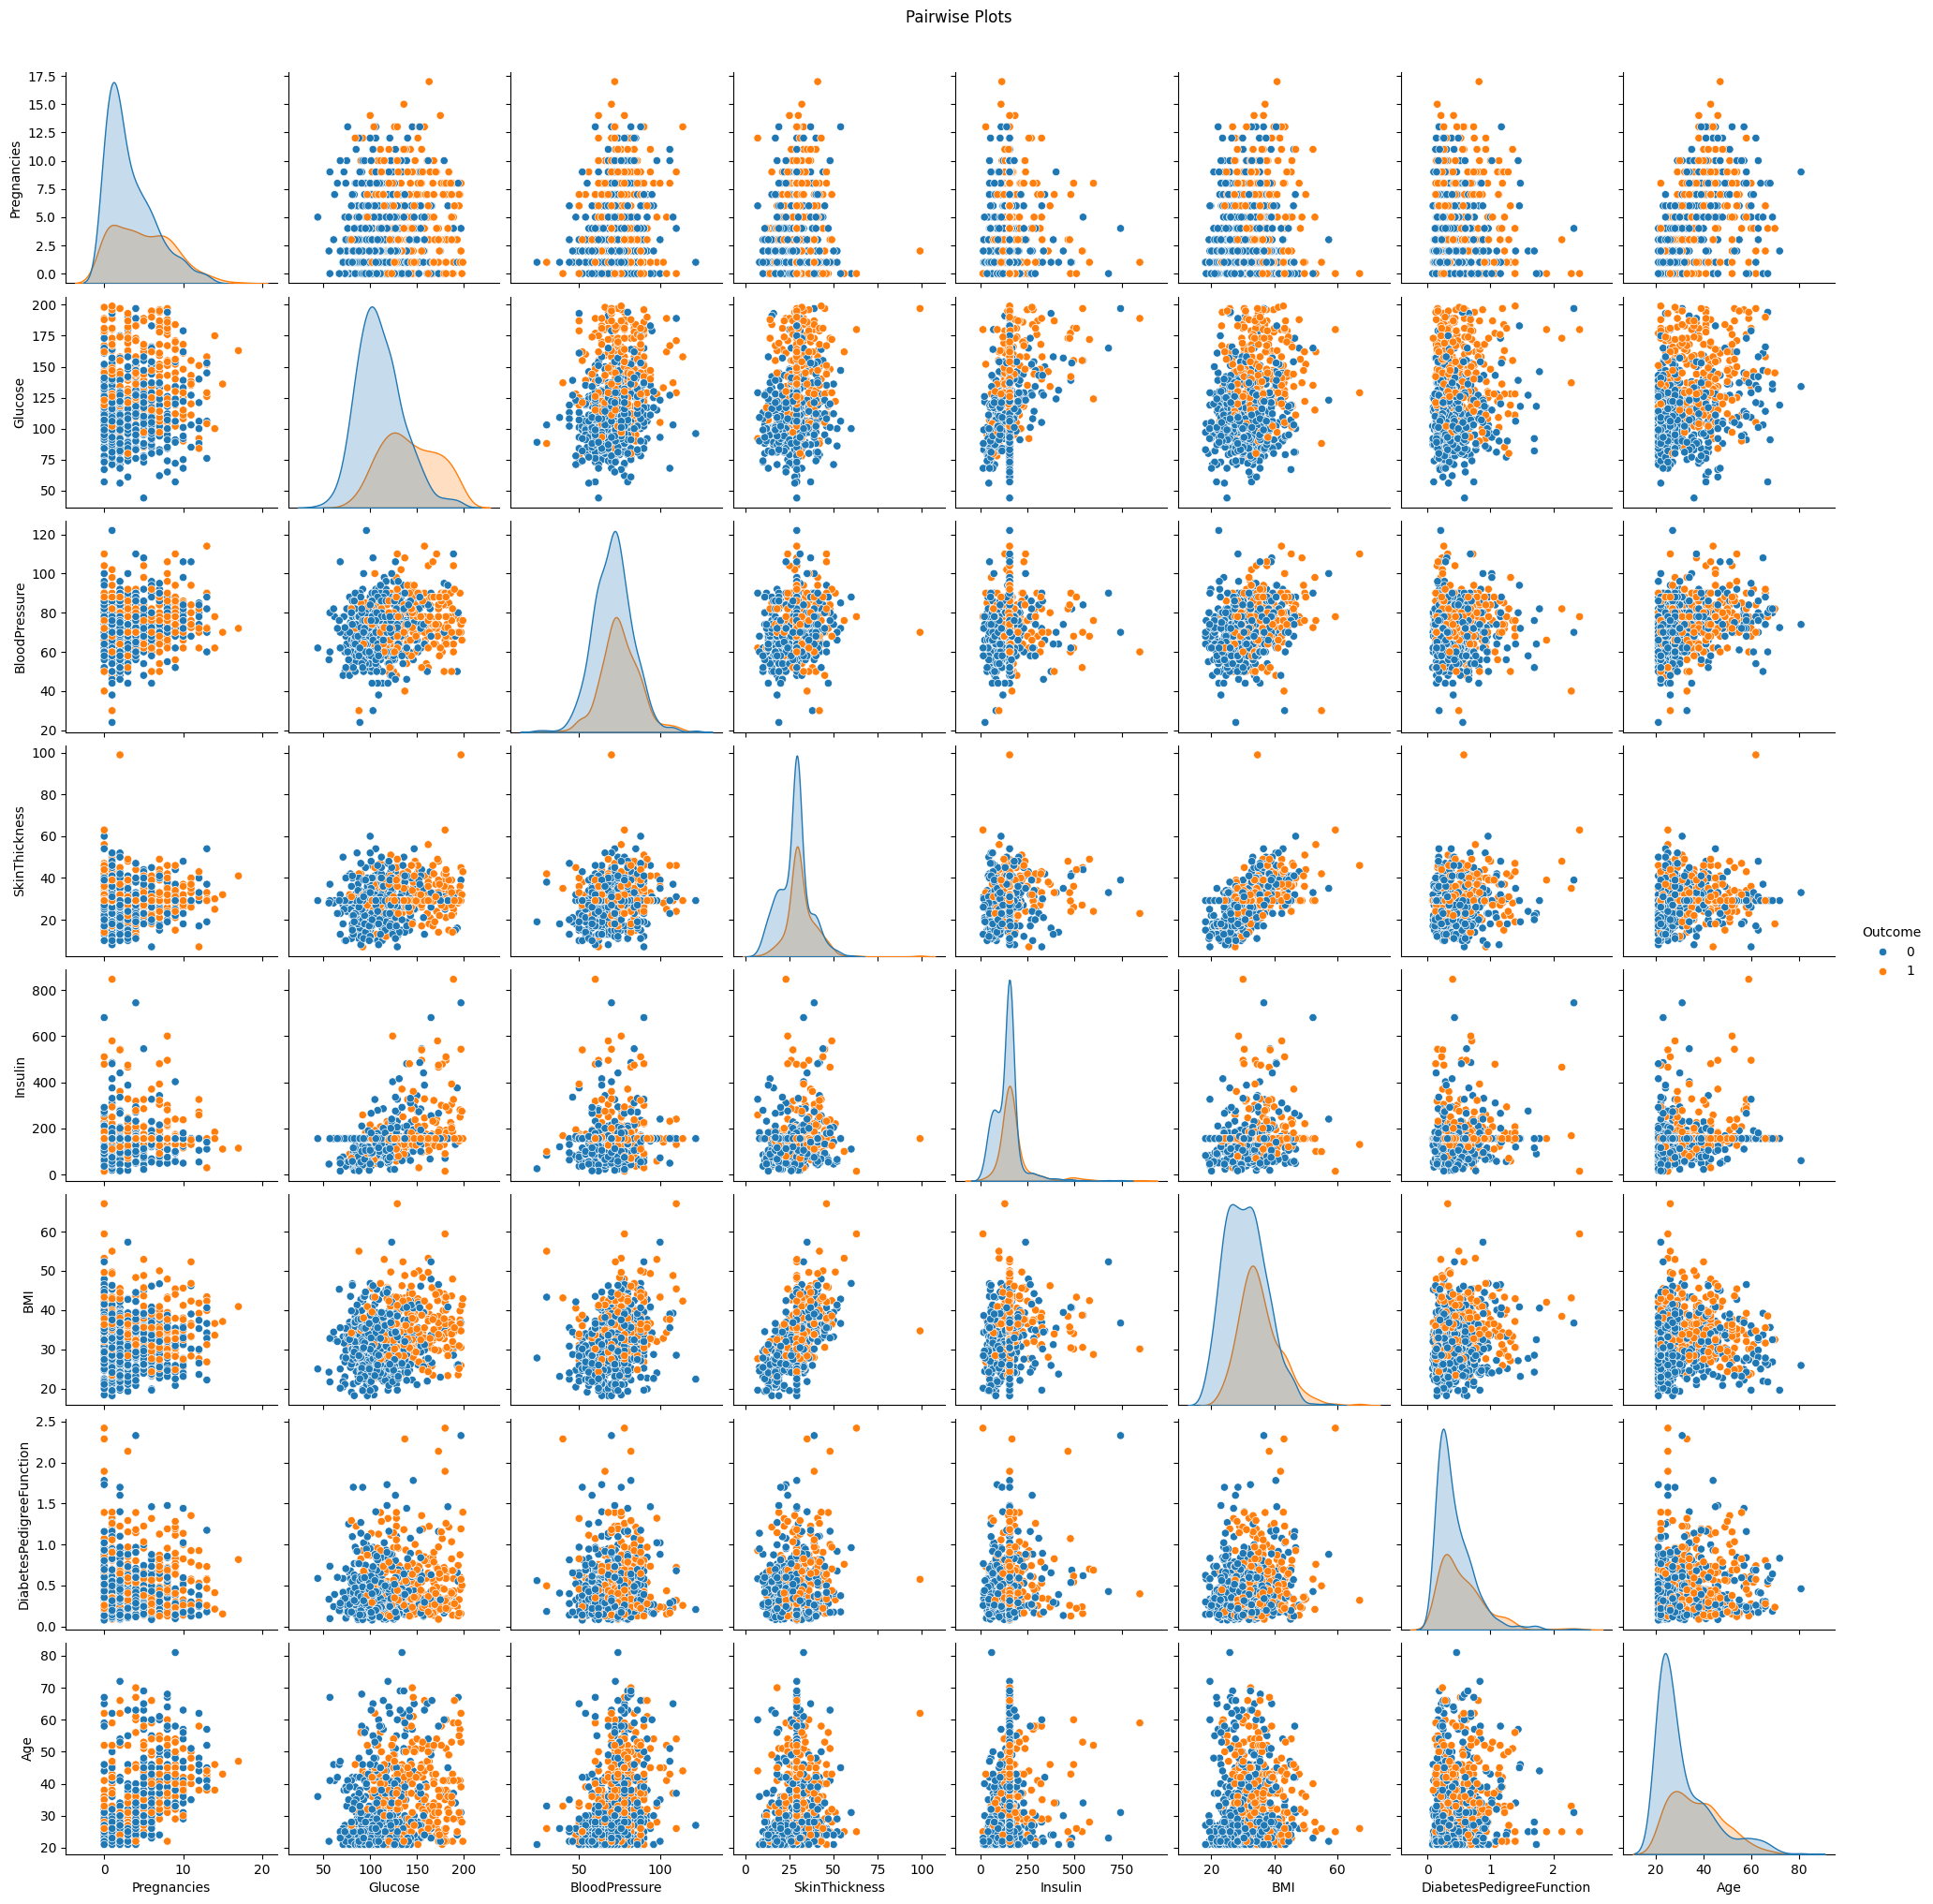

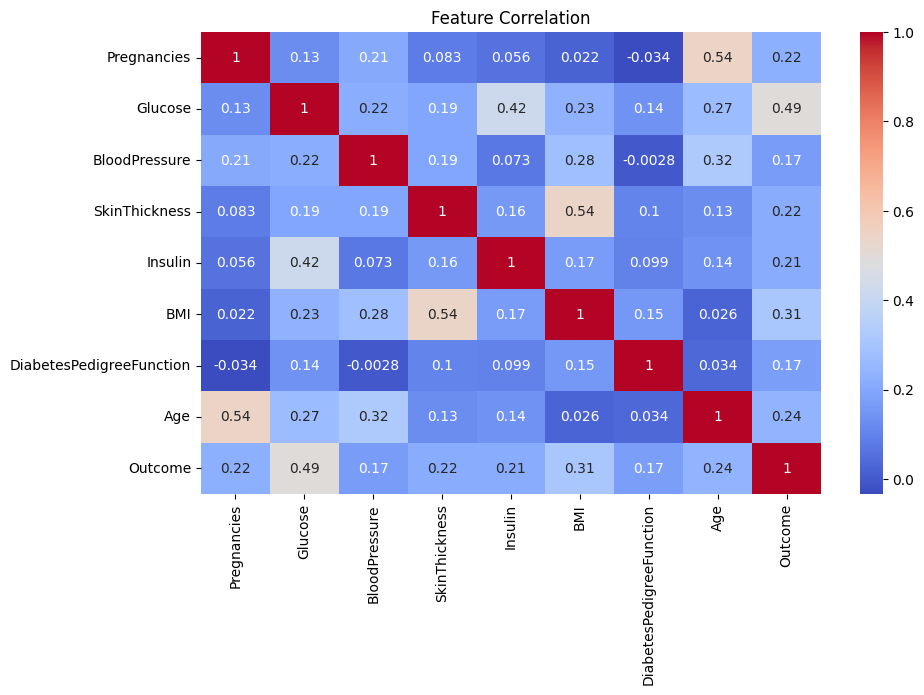

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_gini = model_gini.predict(X_test)
classification_report(y_test, y_pred_gini)


'              precision    recall  f1-score   support\n\n           0       0.79      0.74      0.76       151\n           1       0.56      0.62      0.59        80\n\n    accuracy                           0.70       231\n   macro avg       0.67      0.68      0.67       231\nweighted avg       0.71      0.70      0.70       231\n'

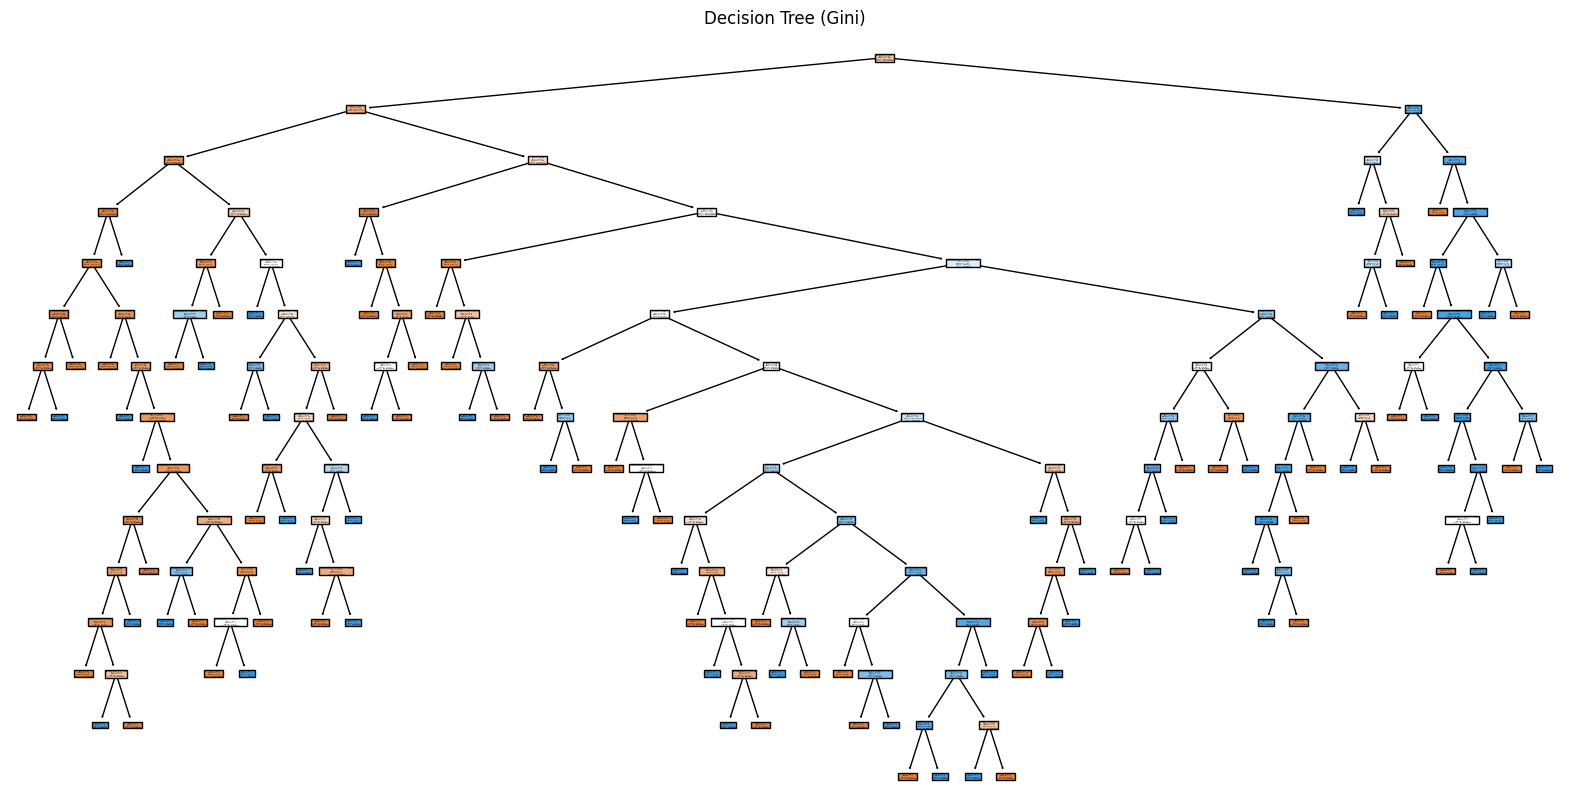

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_gini, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree (Gini)")
plt.show()

In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

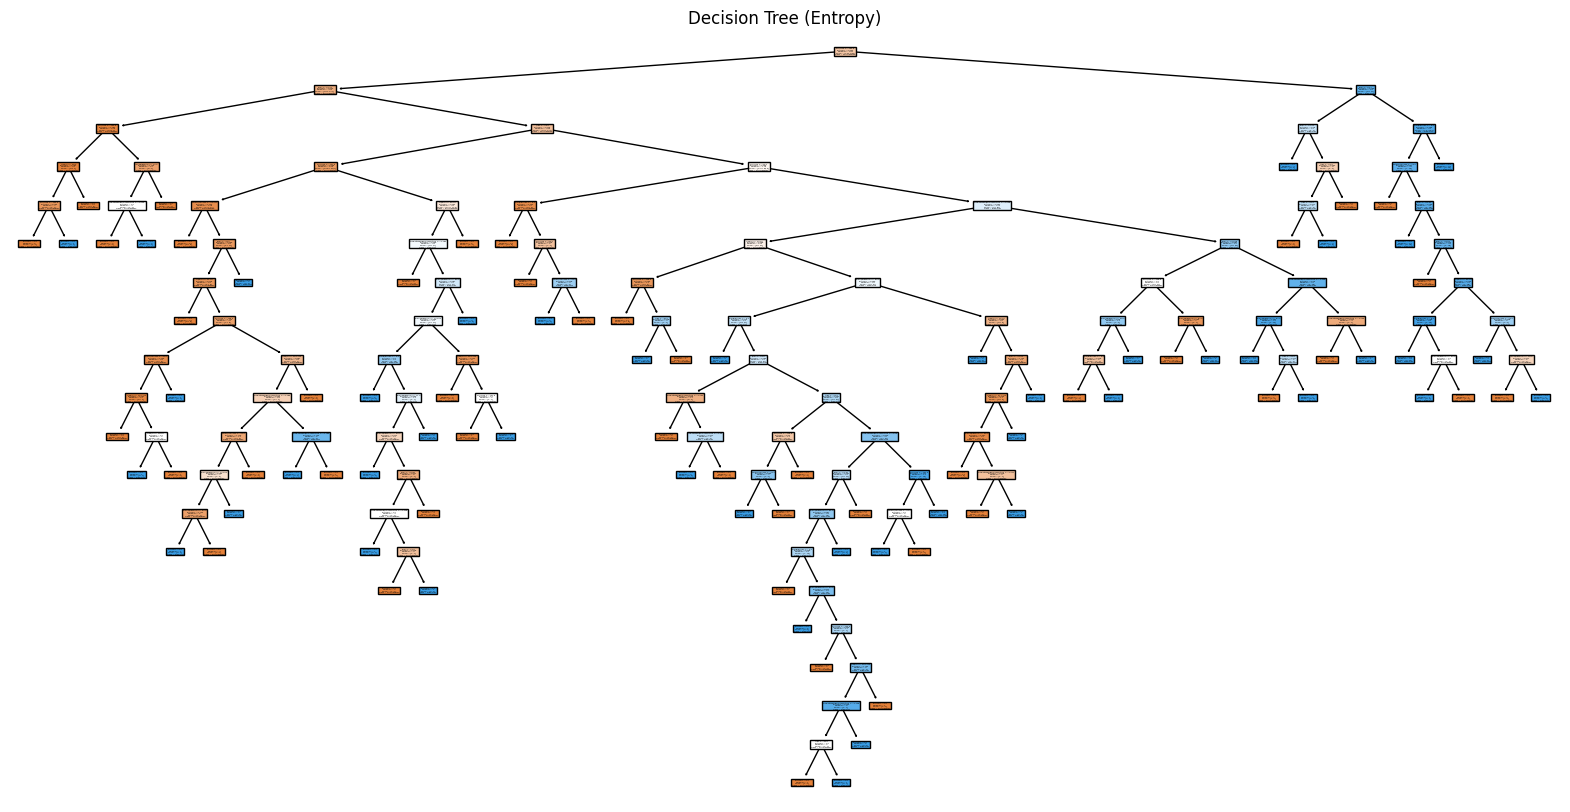

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_entropy, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

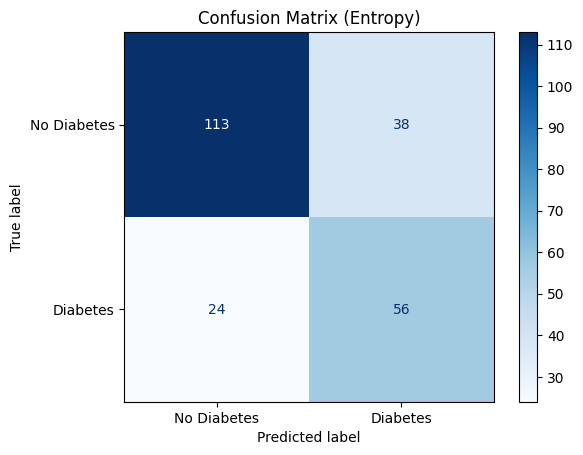

'              precision    recall  f1-score   support\n\n           0       0.82      0.75      0.78       151\n           1       0.60      0.70      0.64        80\n\n    accuracy                           0.73       231\n   macro avg       0.71      0.72      0.71       231\nweighted avg       0.75      0.73      0.74       231\n'

In [ ]:
y_pred_entropy = model_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Entropy)")
plt.show()


classification_report(y_test, y_pred_entropy)